In [203]:
# 1
import pandas as pd
cctv_seoul = pd.read_csv('data/cctv_seoul.csv')

cctv_seoul['CCTV비율'] = cctv_seoul.apply(lambda x : x['CCTV수']/x['인구수']*100, axis=1)
cctv_seoul['노인비율'] = cctv_seoul.apply(lambda x : x['고령자']/x['인구수']*100, axis=1)
cctv_seoul.head()

,구별,CCTV수,인구수,한국인,외국인,고령자,CCTV비율,노인비율
0,강남구,2780,570500.0,565550.0,4950.0,63167.0,0.487292,11.072217
1,강동구,773,453233.0,449019.0,4214.0,54622.0,0.170552,12.051638
2,강북구,748,330192.0,326686.0,3506.0,54813.0,0.226535,16.600342
3,강서구,884,603772.0,597248.0,6524.0,72548.0,0.146413,12.015794
4,관악구,1496,525515.0,507203.0,18312.0,68082.0,0.284673,12.955291


In [49]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)

THEGaeideuk


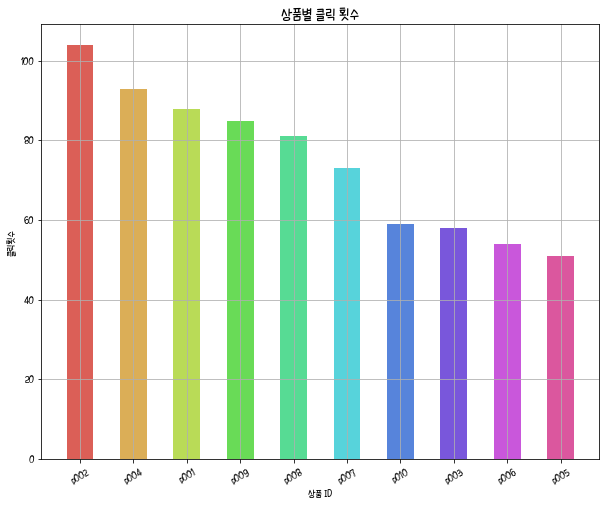

In [208]:
# 2-1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/product_click.log', header=None, sep=' ')
#display(product_click)
colors = sns.color_palette('hls',len(df[1].value_counts()))
plt.figure(figsize=(10,8))
plt.title("상품별 클릭 횟수", fontsize=15)
plt.ylabel('클릭횟수')
plt.xlabel('상품 ID')
plt.xticks(rotation=30)
plt.grid()
plt.bar(df[1].value_counts().index, df[1].value_counts(), width=0.5, color=colors)
plt.show()

In [111]:
# 2-2
df['newclicktime'] = pd.to_datetime(df[0], format='%Y%m%d%H%M')
df['weekname'] = df['newclicktime'].dt.day_name()
maxday = df.weekname.value_counts().index[0]
print(f"클릭 수가 제일 많은 요일은 {maxday}입니다.")

클릭 수가 제일 많은 요일은 Thursday입니다.


In [112]:
# 2-3
df['hour'] = df['newclicktime'].dt.hour
maxhour = df.hour.value_counts().index[0]
print(f"{maxhour}시와 {maxhour+1}시 사이에 제일 많이 클릭했습니다.")

9시와 10시 사이에 제일 많이 클릭했습니다.


In [170]:
# 3-1
import pandas as pd

emp = pd.read_csv('data/emp.csv')
emp.groupby('deptno')[['sal']].sum()

,sal
deptno,
10,8750
20,10875
30,9400


In [171]:
# 3-2
emp.groupby('job')[['sal']].sum()

,sal
job,
ANALYST,6000
CLERK,4150
MANAGER,8275
PRESIDENT,5000
SALESMAN,5600


In [194]:
# 3-3
emp.groupby(['deptno', 'job'])[['sal', 'hiredate']].max()

sal    hiredate
deptno job                        
10     CLERK      1300  1982-01-25
       MANAGER    2450  1981-09-06
       PRESIDENT  5000  1981-11-17
20     ANALYST    3000  1982-12-08
       CLERK      1100  1983-01-12
       MANAGER    2975  1981-03-02
30     CLERK       950  1981-12-03
       MANAGER    2850  1981-05-01
       SALESMAN   1600  1984-10-08

In [195]:
# 3-4
emp.groupby(['job', 'deptno'])[['sal']].max()

sal
job       deptno      
ANALYST   20      3000
CLERK     10      1300
          20      1100
          30       950
MANAGER   10      2450
          20      2975
          30      2850
PRESIDENT 10      5000
SALESMAN  30      1600

In [196]:
# 3-5
pv1 = pd.pivot_table(emp, 
                     index='deptno', 
                     columns='job', 
                     values='sal', 
                     aggfunc='sum')
pv1

job,ANALYST,CLERK,MANAGER,PRESIDENT,SALESMAN
deptno,,,,,
10,NaN,1300.0,2450.0,5000.0,NaN
20,6000.0,1900.0,2975.0,NaN,NaN
30,NaN,950.0,2850.0,NaN,5600.0


In [202]:
# 3-6
pv1.fillna(0.0, inplace=True) # 0으로 하면 heatmap에서 표시가 안됨
pv1

job,ANALYST,CLERK,MANAGER,PRESIDENT,SALESMAN
deptno,,,,,
10,0.0,1300.0,2450.0,5000.0,0.0
20,6000.0,1900.0,2975.0,0.0,0.0
30,0.0,950.0,2850.0,0.0,5600.0


<AxesSubplot:xlabel='job', ylabel='deptno'>

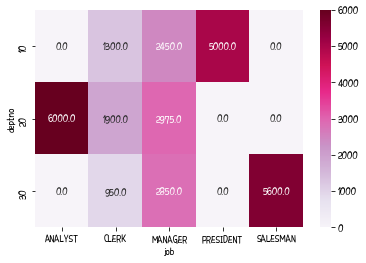

In [200]:
# 3-7
import seaborn as sns

sns.heatmap(pv1, annot=True, cmap="PuRd", fmt='.1f')

In [201]:
# 3-8
emp['hiredatenew'] = pd.to_datetime(emp['hiredate'])
emp['year'] = emp['hiredatenew'].dt.year
emp['month'] = emp['hiredatenew'].dt.month
emp.info()
emp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   empno        14 non-null     int64         
 1   ename        14 non-null     object        
 2   job          14 non-null     object        
 3   mgr          13 non-null     float64       
 4   hiredate     14 non-null     object        
 5   sal          14 non-null     int64         
 6   comm         3 non-null      float64       
 7   deptno       14 non-null     int64         
 8   newhiredate  14 non-null     datetime64[ns]
 9   hiredatenew  14 non-null     datetime64[ns]
 10  year         14 non-null     int64         
 11  month        14 non-null     int64         
dtypes: datetime64[ns](2), float64(2), int64(5), object(3)
memory usage: 1.4+ KB


,empno,ename,job,mgr,hiredate,sal,comm,deptno,newhiredate,hiredatenew,year,month
0,7369,SMITH,CLERK,7902.0,1980-12-17,800,NaN,20,1980-12-17,1980-12-17,1980,12
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20,1600,300.0,30,1981-02-20,1981-02-20,1981,2
2,7521,WARD,SALESMAN,7698.0,1981-02-03,1250,500.0,30,1981-02-03,1981-02-03,1981,2
3,7566,JONES,MANAGER,7839.0,1981-03-02,2975,NaN,20,1981-03-02,1981-03-02,1981,3
4,7654,MARTIN,SALESMAN,7698.0,1981-10-22,1250,1400.0,30,1981-10-22,1981-10-22,1981,10


In [212]:
# 3-9
pv2 = pd.pivot_table(emp, 
                     index=['year', 'month'], 
                     columns='deptno', 
                     values='sal', 
                     aggfunc='max')
pv2.fillna(0.0, inplace=True)
pv2

deptno          10      20      30
year month                        
1980 12        0.0   800.0     0.0
1981 2         0.0     0.0  1600.0
     3         0.0  2975.0     0.0
     5         0.0     0.0  2850.0
     9      2450.0     0.0     0.0
     10        0.0     0.0  1250.0
     11     5000.0     0.0     0.0
     12        0.0  3000.0   950.0
1982 1      1300.0     0.0     0.0
     12        0.0  3000.0     0.0
1983 1         0.0  1100.0     0.0
1984 10        0.0     0.0  1500.0

In [251]:
# 3-10
display(pv2.xs((1981, 12)))
print('--------------------------------------------')
display(pv2.xs(1982))
print('--------------------------------------------')
display(pv2.xs(12, level='month'))

deptno
10       0.0
20    3000.0
30     950.0
Name: (1981, 12), dtype: float64

--------------------------------------------


deptno,10,20,30
month,,,
1,1300.0,0.0,0.0
12,0.0,3000.0,0.0


--------------------------------------------


deptno,10,20,30
year,,,
1980,0.0,800.0,0.0
1981,0.0,3000.0,950.0
1982,0.0,3000.0,0.0


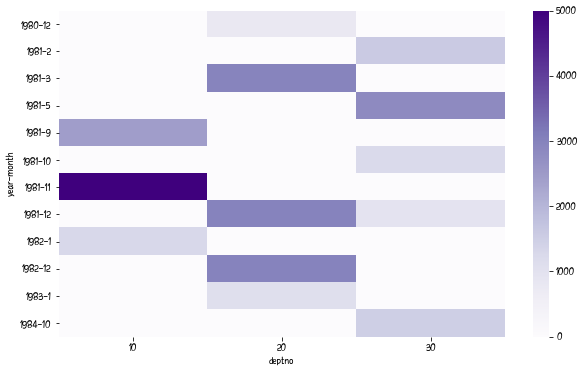

In [277]:
# 3-11
plt.figure(figsize=(10,6))
sns.heatmap(pv2, cmap="Purples")
plt.show()